# Face and Eye Detection with HAAR Cascade Classifiers
Object Detection using Haar feature-based cascade classifiers was proposed by Paul Viola and Michael Jones in their 2001 paper. This is done using Haar features, which are similar to convolutions. The below image is from opencv.org and shows Haar features.
![Haar Features](img/haar_features.jpg)
<br> 
Each feature is a single value obtained by subtracting the sum of pixels under the white rectangle from the sum of pixels under the black rectangle. All possible sizes and locations of each kernel could be used to calculate a lot of features. To reduce the number of features, an integral image is used which reduces calculations for a given tpixel to an operation involving just four pixels. The best features are selected using Adaboost. 
<br> <br>
The final setup in the Viola paper had 6,000 features. In order to improve computational efficiency, they introduced the concept of Cascade of Classifiers. Instead of applying all 6,000 features on a window, the features are grouped into different stages of classifiers and applied one-by-one with a total of 38 stages.

In [2]:
import numpy as np
import cv2
from IPython.display import Image
from IPython.core.display import HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Detecting Face using OpenCV

In [9]:
# load the face classifier. The xml files for opencv can be found on the opencv github under opencv/data/haarcascades
face_classifier = cv2.CascadeClassifier('haar cascades/haarcascade_frontalface_default.xml')

# load an image of myself
image = cv2.imread('img/Luke img 7.jpg')

# use pyrDown twice since my image is high resolution. This will reduce the M x N image to M/4 x N/4
image = cv2.pyrDown(cv2.pyrDown(image))

# show the image using openCV
cv2.imshow('Luke Image', image)
cv2.waitKey()

# convert the image to grayscale in order to use the haar cascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# this will detect the face and put it in an array with the x coordinate, y coordinage, width, and height
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# if the faces array is empty, that means no face was found
if faces.size==0:
    print("No faces found")
    
# this will draw a box around the face with a green 2 pixel box
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 4)
    cv2.imshow('Face Detection', image)
    cv2.waitKey()


cv2.destroyAllWindows()

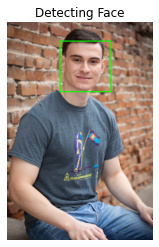

In [10]:
# since matplotlib.pyplot uses RGB but opencv uses BGR, I'll need to convert it to RGB to show it in this jupyter notebook
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.axis('off')
plt.title('Detecting Face')
plt.show()

# Adding Eye Detection

In [11]:
eye_classifier = cv2.CascadeClassifier('haar cascades/haarcascade_eye.xml')
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh),(255,255,0),2)
        cv2.imshow('img',image)
        cv2.waitKey()
cv2.destroyAllWindows()

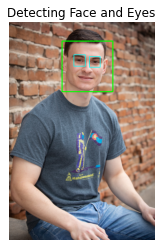

In [12]:
# since matplotlib.pyplot uses RGB but opencv uses BGR, I'll need to convert it to RGB to show it in this jupyter notebook
im_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.title('Detecting Face and Eyes')
plt.axis('off')
plt.show()

# Face Similarity Matching with VGGFace and OpenCV

In [80]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import tensorflow as tf

## Define the VGGFace Model
The VGG-Face model is a deep facial recognition model which was created in Keras in 2018
Here is the architecture for the VGG Face model. (photo can be found here: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/)
![VGG-Face architecture](img/vgg-face-architecture.jpg) 
The model expects 224x224x3 sized input images in RGB colors. The output is a 2622 dimensional vector.

In [74]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [75]:
import os
cwd = os.getcwd()
par_dir = os.path.join(cwd, os.pardir)

In [76]:
# the pretrained weights can be downloaded here: 
# https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
# the weights will not be included in my github project since the file size is too large for github
model.load_weights(os.path.join(par_dir, 'vgg_face_weights.h5'))

In [214]:
def preprocess_image(image_path):
    # reads the image from the filepath
    image = cv2.imread(image_path)
    
    # convert the image to grayscale in order to use the haar cascade
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # this will detect the face and put it in an array with the x coordinate, y coordinage, width, and height
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    # if the faces array is empty, that means no face was found
    if faces.size==0:
        print("No faces found")
    
    # this will crop out just the area with the face, resize to the appropriate size, and normalize the image
    for (x,y,w,h) in faces:
        just_face = image[y:y+h, x:x+w]
        just_face = cv2.cvtColor(just_face, cv2.COLOR_BGR2RGB)
        im = Image.fromarray(np.uint8(just_face))
        im = im.resize((224, 224))
        im = img_to_array(im, dtype=np.uint8)
        im = np.expand_dims(im, axis=0)
        # preprocess_input() normalizes input in the scale of [-1, +1]
        im_normalized = preprocess_input(im)
    return im, im_normalized
    

In [150]:
im, im_normalized = preprocess_image('img/Luke img 7.jpg')

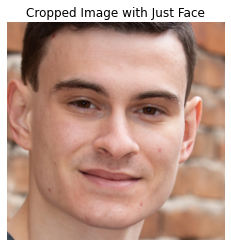

In [151]:
plt.imshow(tf.squeeze(im))
plt.title('Cropped Image with Just Face')
plt.axis('off')
plt.show()

In [83]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [93]:
epsilon = 0.40

def verifyFace(img1_name, img2_name):
    img1_path = 'img/' + img1_name
    img2_path = 'img/' + img2_name
    plt_img1, img1 = preprocess_image(img1_path)
    plt_img2, img2 = preprocess_image(img2_path)
    img1_representation = vgg_face_descriptor.predict(img1)[0,:]
    img2_representation = vgg_face_descriptor.predict(img2)[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(tf.squeeze(plt_img1))
    plt.axis('off')
    #plt.imshow(image.load_img('./training_faces/%s' % (img1)))
    #plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(tf.squeeze(plt_img2))
    plt.axis('off')
    plt.show(block=True)
    #plt.imshow(image.load_img('./training_faces/%s' % (img2)))
    #plt.xticks([]); plt.yticks([])
    #plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

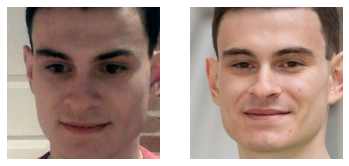

Cosine similarity:  0.214697003364563
They are same person


In [217]:
verifyFace('Luke img 1.jpg','Luke img 5.jpg')

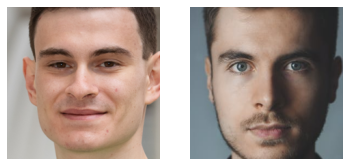

Cosine similarity:  0.4098988175392151
They are not same person!


In [112]:
verifyFace('Luke img 5.jpg','John.jpeg')

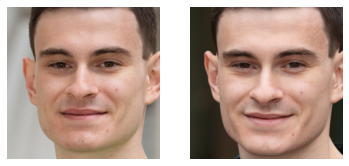

Cosine similarity:  0.03382515907287598
They are same person


In [113]:
verifyFace('Luke img 5.jpg','Luke img 4.jpg')

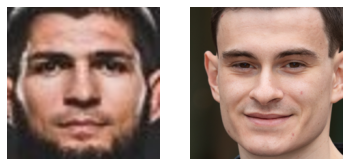

Cosine similarity:  0.48568040132522583
They are not same person!


In [98]:
verifyFace('khabib.jpg','Luke img 4.jpg')

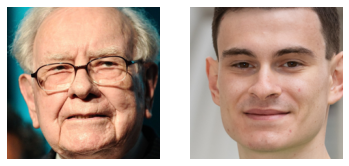

Cosine similarity:  0.6875624358654022
They are not same person!


In [106]:
verifyFace('buffet.jpg','Luke img 5.jpg')

# Facial Recognition with One Shot Learning
Here's I'm going to extract the faces needed for my one-shot learning model. It will load 5 extracted faces.

In [243]:
from os import listdir
from os.path import isfile, join

# create a function to setup the directories that I'll be using to store my images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

# load face detector
face_detector = cv2.CascadeClassifier('haar cascades/haarcascade_frontalface_default.xml')

In [244]:
mypath = "./people/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [245]:
print("Collected " + str(len(image_file_names)) + " images")
print(image_file_names)

Collected 5 images
['John.jpeg', 'Kevin.jpeg', 'Luke.jpg', 'Peter.jpeg', 'Phil.jpeg']


In [246]:
makedir("./group_of_faces/")

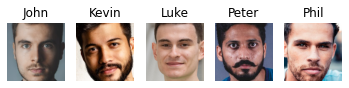

In [247]:
f = plt.figure()
a = []
for i, image_name in enumerate(image_file_names):
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x, y, w, h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (224, 224), interpolation = cv2.INTER_CUBIC)
        
    path = "./group_of_faces/" + "face_" + image_name
    cv2.imwrite(path, roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    f.add_subplot(1, 5, i + 1)
    plt.imshow(roi)
    plt.axis('off')
    person_name, _ = image_name.split(".")
    plt.title(person_name)
plt.show()

# Testing model using my Webcam
This code looks up the faces that I extracted in the "group_of_faces" folder and uses Cosine Similarity to detect which face is most similar to the one being extracted from the webcam

In [248]:
def preprocess_image(image_path):
    """Loads image from path and resizes it"""
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [249]:
people_pictures = "./group_of_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    all_people_faces[person_face] = model.predict(preprocess_image('./group_of_faces/%s' % (file)))[0,:]

In [250]:
for i in all_people_faces:
    print(i)

face_John
face_Kevin
face_Luke
face_Peter
face_Phil


In [241]:
# Open Webcam
cap = cv2.VideoCapture(0)

while(True):
    ret, img = cap.read()
    faces = face_detector.detectMultiScale(img, 1.3, 5)

    for (x,y,w,h) in faces:
        if w > 100: #Adjust accordingly if your webcam resoluation is higher
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
            detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
            detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels, axis = 0)
            img_pixels /= 255

            captured_representation = model.predict(img_pixels)[0,:]

            found = 0
            for i in all_people_faces:
                person_name = i
                representation = all_people_faces[i]

                similarity = findCosineSimilarity(representation, captured_representation)
                if(similarity < 0.35):
                    cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    found = 1
                    break

            #connect face and text
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
            cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

            if(found == 0): #if found image is not in our people database
                cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('img',img)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

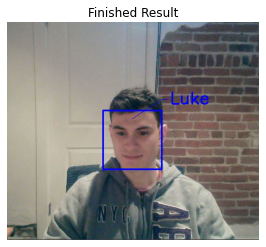

In [254]:
image = plt.imread('./finished_result/Finished Result.JPG')
plt.imshow(image)
plt.title('Finished Result')
plt.axis('off')
plt.show()